# Project description
You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017. 

(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026.)

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.


Data description
—Name 

—Platform 

—Year_of_Release 

—Genre 

—NA_sales (North American sales in USD million) 

—EU_sales (sales in Europe in USD million) 

—JP_sales (sales in Japan in USD million) 

—Other_sales (sales in other countries in USD million) 

—Critic_Score (maximum of 100) 

—User_Score (maximum of 10) 

—Rating (ESRB)

Data for 2016 may be incomplete.

In [2]:
import pandas as pd
import numpy as np
import streamlit as st
import plotly.express as px
from matplotlib import pyplot as plt
import altair
from scipy import stats as sc


In [3]:
df = pd.read_csv('games.csv')



In [4]:
df.columns = df.columns.str.lower()
# Making all column headers lower case for easier analsysis
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.columns = df.columns.str.lower().str.replace(' ','')
# making certain theres no space between commas in the column headers

In [6]:
#df.info()
value_counts = df['user_score'].value_counts()

value_counts

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

In [7]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
# Converting the user_score column to floats, I'm using the errors= 'coerce' parameter to convert all of the 'tbd' values and whatever values that couldn't be converted to floats to NaN values.
df['user_score'].isna().sum()

9125

Converting the user_score to float type because in the future I will most likely have to analyze the ratings scores and I can't do any sort of numerical analsysis unless the datatype is of float or int type.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [9]:
df['user_score'].duplicated().sum()
# No duplicated rows within the entire dataset

16619

In [10]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
def count_mismatched_rows(df):
    
    col1, col2 = 'critic_score', 'user_score'
    
    # Conditions where one column is NaN and the other is not
   
     # Created a boolean where each element is true if the value in col1 is NaN and the value in col2 is not missing.
    condition1 = df[col1].isna() & df[col2].notna()
    
    # Created a boolean where each element is true if the value in col1 is not missing and the value in col2 is missing.
    condition2 = df[col1].notna() & df[col2].isna()
    
    
    # Count rows that match the conditions
    # The shape attribute returns a tuple representing the number of rows and the second element is the number of columns and I used 0 to indicate that were only looking at rows
    
    # This line will count the number of times condition1 and condition2 happen for rows only and the pipeline is used to combine the two conditions meaning a row will be counted if either condition1 is true or condition2 is true
    
    mismatch_count = df[condition1 | condition2].shape[0]
  
    return mismatch_count


mismatched_rows_count = count_mismatched_rows(df)

print(f"Number of rows with a value in one column but not the other: {mismatched_rows_count}")

Number of rows with a value in one column but not the other: 1693


In [12]:
df['name'].nunique()

11559

## Missing Value Analysis
There are many missing values from this dataset. The name column has two missing values which could be because the games ina different language and the inputters of the data just couldn't figure out the name or of course they could have just forgtten to put their names in. For our numerical data none of the sales columns having missing values however many have values of 0 indicating there were no sales on those games. For the score columns most likely many of the games were simply not given scores and for the rating columns many of which were not given a rating. 

I also decided to keep the NaN values and fill in using the median, there's too many missing values and I feel adding in median values for each one would skew the data in the wrong direction. Particucular regions may have very few values and some may have way more and if we were to fill in those missing values with the median it may drastically bump up or bring down those regions. I may in the future add median values for each particular region in seperate DataFrames in the future. It will also screw up my standard deviation, my distribution would be completely skewed towards the center with how many missing values there are to be replaced which is around 8,000. 

On top of this I created a function that cants the mismatch beween critic and user score to see how many rows have a score of one of them but not of the other. I though this would be useful when dropping NaN values later on to determine whether I wanted to drop all the NaN values from both columns simulateaoulsy or create two different data frames. 



In [13]:
# This code adds up all the columns we indicated it to and used sum with the axis parameters to indicate we wanted to add each column we told it to together. 

# I need to remember to plug two sets of brackets around a list of column names, if it was one column I'd only use one set of brackets.
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [14]:
df = df.sort_values(by= 'year_of_release', ascending= True)

df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1764,Kaboom!,2600,1980.0,Misc,1.07,0.07,0.0,0.01,NaN,NaN,NaN,1.15
546,Missile Command,2600,1980.0,Shooter,2.56,0.17,0.0,0.03,NaN,NaN,NaN,2.76
1968,Defender,2600,1980.0,Misc,0.99,0.05,0.0,0.01,NaN,NaN,NaN,1.05
6300,Bridge,2600,1980.0,Misc,0.25,0.02,0.0,0.00,NaN,NaN,NaN,0.27
6875,Checkers,2600,1980.0,Misc,0.22,0.01,0.0,0.00,NaN,NaN,NaN,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.0,0.00,43.0,NaN,E10+,0.01
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.0,0.00,69.0,6.5,T,0.01
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.0,0.00,59.0,6.7,M,0.01
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.0,0.00,NaN,NaN,NaN,0.01


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16715 entries, 1764 to 16522
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


In [16]:
df['year_of_release'].unique()

# Creating a new DataFrame of year_of_release and the count of the rows (games) in each group (year)
games_per_year = df.groupby('year_of_release').size().reset_index(name='Number of Games per Year')

games_per_year = games_per_year.sort_values(by= 'Number of Games per Year', ascending= True )

games_per_year.head()



,year_of_release,Number of Games per Year
0,1980.0,9
4,1984.0,14
5,1985.0,14
8,1988.0,15
10,1990.0,16


In [17]:
fig = px.bar(games_per_year, x='year_of_release', y='Number of Games per Year',
             title='Number of Games Released per Year',
             labels={'year_of_release': 'Year of Release', 'Number of Games per year': 'Number of Games'},
             color='Number of Games per Year')
fig.show()

## Number of Games Produced Each Year (bar chart)


The most games produced in a year is in 2008 with 1,427 games produced

The least is 1980 with only 9 games produced

In [18]:
df['platform'].unique()

array(['2600', 'NES', 'DS', 'PC', 'GB', 'SNES', 'GEN', 'GG', 'NG', 'SCD',
       'SAT', 'PS', '3DO', 'TG16', 'N64', 'PCFX', 'DC', 'WS', 'PS2',
       'GBA', 'XB', 'GC', 'PSP', 'X360', 'PS3', 'Wii', '3DS', 'PSV',
       'WiiU', 'XOne', 'PS4'], dtype=object)

In [19]:
sales_df = df[['name', 'year_of_release', 'platform', 'total_sales']]

sales_df

,name,year_of_release,platform,total_sales
1764,Kaboom!,1980.0,2600,1.15
546,Missile Command,1980.0,2600,2.76
1968,Defender,1980.0,2600,1.05
6300,Bridge,1980.0,2600,0.27
6875,Checkers,1980.0,2600,0.23
...,...,...,...,...
16373,PDC World Championship Darts 2008,NaN,PSP,0.01
16405,Freaky Flyers,NaN,GC,0.01
16448,Inversion,NaN,PC,0.01
16458,Hakuouki: Shinsengumi Kitan,NaN,PS3,0.01


In [20]:
total_sales_by_platform = sales_df.groupby('platform')['total_sales'].sum().reset_index(name='total_platform_sales')

total_sales_by_platform = total_sales_by_platform.sort_values(by='total_platform_sales', ascending= False)

total_sales_by_platform.head()

,platform,total_platform_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12


In [21]:
top_platforms = total_sales_by_platform['platform'].head(5)  


yearly_sales = sales_df[sales_df['platform'].isin(top_platforms)].groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

yearly_sales


,year_of_release,platform,total_sales
0,1985.0,DS,0.02
1,2000.0,PS2,39.17
2,2001.0,PS2,166.43
3,2002.0,PS2,205.38
4,2003.0,PS2,184.31
5,2004.0,DS,17.27
6,2004.0,PS2,211.81
7,2005.0,DS,130.14
8,2005.0,PS2,160.66
9,2005.0,X360,8.25


In [22]:
fig = px.line(yearly_sales, x='year_of_release', y='total_sales', color='platform',
              title='Yearly Total Sales for Top Platforms',
              labels={'year_of_release': 'Year of Release', 'total_sales': 'Total Sales (Millions)'},
              markers=True)


fig.show()

## Sales for each Platform Overtime (line graph)

This is a line graph of the top 5 most sold platforms

You can see the trend for each indvidual platform regarding sales on this line graph.

DS for example goes from sales of 17.27 million in 2004 to 130.14 million in 2005 however DS's sales have been decreasing from 2007 on. 


In [23]:
platform_lifecycle = sales_df.groupby('platform')['year_of_release'].agg(first_year='min', last_year='max').reset_index()
# building a new DataFrame that has the platform year_of_release and then also the first and last year of each platform
platform_lifecycle.head()

,platform,first_year,last_year
0,2600,1980.0,1989.0
1,3DO,1994.0,1995.0
2,3DS,2011.0,2016.0
3,DC,1998.0,2008.0
4,DS,1985.0,2013.0


In [24]:
platform_lifecycle['lifecycle_duration'] = platform_lifecycle['last_year'] - platform_lifecycle['first_year']
platform_lifecycle.head()

# calculated the lifecycle_duration

,platform,first_year,last_year,lifecycle_duration
0,2600,1980.0,1989.0,9.0
1,3DO,1994.0,1995.0,1.0
2,3DS,2011.0,2016.0,5.0
3,DC,1998.0,2008.0,10.0
4,DS,1985.0,2013.0,28.0


In [25]:
platform_lifecycle['lifecycle_duration'].describe()

count    31.000000
mean      7.612903
std       6.998464
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: lifecycle_duration, dtype: float64

In [26]:
fig = px.histogram(platform_lifecycle, x='lifecycle_duration',
                   title='Distribution of Platform Lifecycles',
                   labels={'lifecycle_duration': 'Lifecycle Duration (Years)'},
                   nbins=30)  
fig.show()

## Distribution of Platform Lifecycles 
The average time it takes a video game to decrease all the way to 0 sales.

The average lifecycle for platforms are around 7.6 years on average 

The most common lifespan cycle for platforms between is between 10-11 years.

 


In [27]:
sales_df.head()

,name,year_of_release,platform,total_sales
1764,Kaboom!,1980.0,2600,1.15
546,Missile Command,1980.0,2600,2.76
1968,Defender,1980.0,2600,1.05
6300,Bridge,1980.0,2600,0.27
6875,Checkers,1980.0,2600,0.23


In [28]:
# looking at the data from 2005 to 2015 because we want to analyze which games are still currently growing taking into consideration the lifecycle for platforms which is on avg 7 years
# We should also understand that because 2016 is our last set of data and it says in the directions that 2016 is not finished we should not incoprorate that year because the total_sales will be less not because its revenue is shrinking necessarily but because there's less data 
filtered_df = df[(df['year_of_release'] >= 2005) & (df['year_of_release'] <= 2015)]
filtered_df.head()






,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9553,Yu-Gi-Oh! Nightmare Troubadour (JP sales),DS,2005.0,Action,0.00,0.03,0.1,0.00,NaN,NaN,NaN,0.13
14154,MX World Tour Featuring Jamie Little,XB,2005.0,Racing,0.03,0.01,0.0,0.00,51.0,NaN,E,0.04
3171,X-Men Legends II: Rise of Apocalypse,PS2,2005.0,Role-Playing,0.53,0.02,0.0,0.09,82.0,7.3,T,0.64
5958,NBA Street V3,GC,2005.0,Sports,0.23,0.06,0.0,0.01,88.0,8.4,E,0.30
9594,DT Racer,PS2,2005.0,Racing,0.06,0.05,0.0,0.02,NaN,3.8,E,0.13


In [29]:
annual_sales_per_platform = filtered_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index(name= 'Total Sales per Year').fillna(0)
annual_sales_per_platform.head()

,year_of_release,platform,Total Sales per Year
0,2005.0,DS,130.14
1,2005.0,GBA,33.86
2,2005.0,GC,27.62
3,2005.0,PC,4.37
4,2005.0,PS2,160.66


In [30]:
fig = px.line(annual_sales_per_platform, x='year_of_release', y='Total Sales per Year', color='platform',
              title='Yearly Total Sales for all Platforms',
              labels={'year_of_release': 'Year of Release', 'total_sales': 'Total Sales'},
              markers=True)


fig.show()

## Yearly Total Sales for all Platform (line graph)

Platforms that as of 2015 are leading sales are the XOne and the PS4. More specifically the PS4 was at 118 million and XOne was at 60 million
 
The PS4 and the XOne are the only two platforms that are increasing, every single other platform is decreasing in sales.

For example the wii u has been declining in total sales since 2014 and the PSP since 2009

It should be recognized that the games that are increasing both came out around 2013 so they are the newest games 

The differences in sales:

From the line graph the highest amount of sales a platform made was wii in 2009 at 206 million and then in second is the X360 at 170 million in 2010. We notice here that sales in general between all platforms have decreased substantially since the late 2000's and early 2010's. Are platforms decreasing in popularity? Are video games becoming less popular? 

In [31]:
mean_sales_by_platform = filtered_df.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

mean_sales_by_platform

platform
PS4     1.074079
XOne    0.832313
X360    0.787301
PS3     0.731656
Wii     0.693385
WiiU    0.583383
3DS     0.520751
PS2     0.400432
DS      0.374578
GC      0.277660
XB      0.244286
PSP     0.239788
GBA     0.236333
PC      0.214150
PSV     0.144070
DC      0.030000
Name: total_sales, dtype: float64

In [32]:
filtered_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9553,Yu-Gi-Oh! Nightmare Troubadour (JP sales),DS,2005.0,Action,0.00,0.03,0.1,0.00,NaN,NaN,NaN,0.13
14154,MX World Tour Featuring Jamie Little,XB,2005.0,Racing,0.03,0.01,0.0,0.00,51.0,NaN,E,0.04
3171,X-Men Legends II: Rise of Apocalypse,PS2,2005.0,Role-Playing,0.53,0.02,0.0,0.09,82.0,7.3,T,0.64
5958,NBA Street V3,GC,2005.0,Sports,0.23,0.06,0.0,0.01,88.0,8.4,E,0.30
9594,DT Racer,PS2,2005.0,Racing,0.06,0.05,0.0,0.02,NaN,3.8,E,0.13


In [33]:
fig = px.box(filtered_df, x='platform', y='total_sales',
             title='Global Sales of All Games by Platform (2005-2016)',
             labels={'total_sales': 'Global Sales (Millions)', 'platform': 'Platform'})



fig.show()

## Distribution of Global Sales for all games, broken down by platforms (boxplot)

The small box sizes indicate that the median sales (IQR 50%) are relatively low. meaning that a sigificant number of games are quite low compared to the highest selling games.

The presence of many outliers tells us that there are many games that perform exceptionally well compared to the median per platform, selling much more than the majority of othe rgames. In the video game industry its seems like its common for a few blockbuster titled video games to have sales that far exceed the average, while most video games achieve moderate to low sales.



In [34]:
filtered_logs = filtered_df.copy()

# Apply the log transformation
filtered_logs['log_total_sales'] = np.log(filtered_df['total_sales'].replace(0, 0.01))

fig = px.box(filtered_logs, x='platform', y='log_total_sales',
             title='Log of Global Sales by Platform (2005-2016)',
             labels={'log_total_sales': 'Log of Global Sales (Millions)', 'platform': 'Platform'})

# Show the figure
fig.show()

# Distribution of Global Sales for all games (from 2005-2015), broken down by platforms (boxplot using logs)

By transforming values into logs it makes all the values signficantly smaller making those values that are much larger than the rest smaller. This helps with distribution the data more evenly across a smaller scale. 

This is useful when dealing with data where there are extreme outliers that are much larger than the majority of the dataset. We can now see the medians and quartiles much more clearly because the data is more evenly spread out and not skewed by a few large values, the medians and quartiles (which are represented in the boxplots) become easier to compare across different categories. Without the log transformation like we did above the boxes are squished and overshawdowed by outliers, making it hard to see statistics.

X360 has the highest median sales per video game followed by PS3 and we can also see that the most earned on a video game from this DataFrame was the Wii. And the lowest median sales on a platform for their video games was the DC.

In [35]:
critic_scores_df = df[['name', 'platform', 'year_of_release', 'total_sales', 'critic_score']]
# Im dropping all rows when the value of column critic_score is NaN. I didn't want to add median values for those because if I were to draw up a distribution it would screw up my analsysis and skew everything towards the center
critic_scores_df = critic_scores_df.dropna(subset=['critic_score'])
critic_scores_df

,name,platform,year_of_release,total_sales,critic_score
14470,Alter Ego,PC,1985.0,0.04,59.0
14621,SimCity,PC,1988.0,0.03,64.0
14610,Doom,PC,1992.0,0.02,85.0
1567,Battle Arena Toshinden,PS,1994.0,1.26,69.0
9214,Super Puzzle Fighter II Turbo,PS,1996.0,0.14,83.0
...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,0.01,86.0
16373,PDC World Championship Darts 2008,PSP,NaN,0.01,43.0
16405,Freaky Flyers,GC,NaN,0.01,69.0
16448,Inversion,PC,NaN,0.01,59.0


In [36]:
user_scores_df = df[['name', 'platform', 'year_of_release', 'total_sales', 'user_score']]
# Im dropping all rows when the value of column user_score is NaN. I didn't want to add median values for those because if I were to draw up a distribution it would screw up my analsysis and skew everything towards the center
user_scores_df = user_scores_df.dropna(subset=['user_score'])

user_scores_df

,name,platform,year_of_release,total_sales,user_score
14470,Alter Ego,PC,1985.0,0.04,5.8
14621,SimCity,PC,1988.0,0.03,2.2
14610,Doom,PC,1992.0,0.02,8.2
1567,Battle Arena Toshinden,PS,1994.0,1.26,6.3
9214,Super Puzzle Fighter II Turbo,PS,1996.0,0.14,7.4
...,...,...,...,...,...
16157,Aquaman: Battle for Atlantis,XB,NaN,0.01,2.7
16277,Homeworld Remastered Collection,PC,NaN,0.01,8.2
16405,Freaky Flyers,GC,NaN,0.01,6.5
16448,Inversion,PC,NaN,0.01,6.7


In [37]:
#ps4_critic_df = critic_scores_df[critic_scores_df['platform'] == 'PS4']
#ps4_user_df = user_scores_df[user_scores_df['platform'] == 'PS4']
# Using PS4 for my analsysis

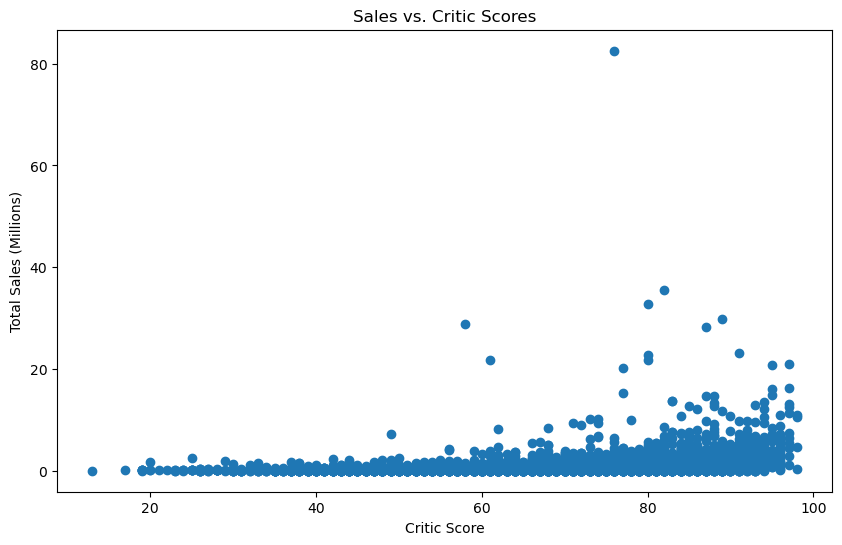

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(critic_scores_df['critic_score'], critic_scores_df['total_sales'])
plt.title('Sales vs. Critic Scores')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (Millions)')
plt.show()


In [39]:
correlation_c = critic_scores_df[['critic_score', 'total_sales']]
# Calculating correlation
correlation_c.corr().round(2)

,critic_score,total_sales
critic_score,1.00,0.25
total_sales,0.25,1.00


### Critic Score vs Game Sales Correlation (Scatter)

The correlation of a 0.25 is considered weak and suggests a relationship maybe further looking at, however it is most likely uncorrelated meaning there are plenty of games with high ratings who didn't get many sales 

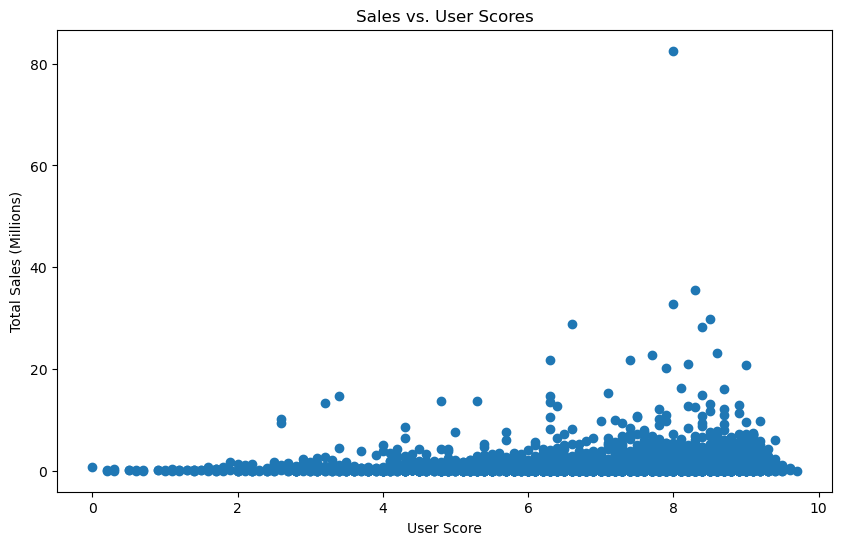

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(user_scores_df['user_score'], user_scores_df['total_sales'])
plt.title('Sales vs. User Scores')
plt.xlabel('User Score')
plt.ylabel('Total Sales (Millions)')
plt.show()

In [41]:
correlation_u = user_scores_df[['user_score', 'total_sales']]
# Calculating correlation
correlation_u.corr().round(2)

,user_score,total_sales
user_score,1.00,0.09
total_sales,0.09,1.00


## Correlation between Total Sales and Score Ratings

The correlations between the scoring columns and how much a game would earn in sales is not very correlated. I did also look at the PS4 platform specifically as well and the ratings also did not have a strong crrelation to the total sales 

### User Score vs Game Sales Correlation (Scatter)

A correlation of 0.09 is very weak and suggests that there most likely isnt any relationship between user score and total sales

### Critic Score vs Game Sales Correlation (Scatter)

The correlation of a 0.25 is considered weak and suggests a relationship maybe further looking at, however it is most likely uncorrelated meaning there are plenty of games with high ratings who didn't get many sales 



In [42]:
df[['platform',]]



,platform
1764,2600
546,2600
1968,2600
6300,2600
6875,2600
...,...
16373,PSP
16405,GC
16448,PC
16458,PS3


In [43]:
genre_df = df.groupby(['year_of_release', 'genre'])['total_sales'].sum().reset_index(name= 'Total Sales per Year')

genre_df.sort_values(by='Total Sales per Year', ascending= False).head(20)


,year_of_release,genre,Total Sales per Year
291,2009.0,Action,137.69
301,2009.0,Sports,137.37
265,2006.0,Sports,135.78
279,2008.0,Action,134.96
339,2013.0,Action,122.51
327,2012.0,Action,119.25
315,2011.0,Action,116.68
303,2010.0,Action,115.29
267,2007.0,Action,104.85
323,2011.0,Shooter,98.18


In [44]:
fig = px.histogram(genre_df, x="genre", y="Total Sales per Year",
                   color="genre",
                   histfunc="avg",
                   title="Average Total Sales per Year by Genre (2005-2015)",
                   labels={"genre": "Genre", "Total Sales per Year": "Average Total Sales (Millions)"})
                   

fig.update_layout(barmode='group', xaxis={'categoryorder':'total descending'}) # puts them from highest to lowest
fig.show()

## Average Tota Sales per Year by Genre 

The action genre earns the most money per year and then in second is the sports genre. 

By looking at the DataFrame we can actually see that some years many other Genres have beaten out the action genre in total sales such as 2009 and 2011. In which the total sales of Sports genre  recorded as the second and third highest annual sales figures ever for any genre.

The top 5 Genres are Action, Sports, Role-Playing, Shooter and Misc

In [45]:
top_platforms

16     PS2
28    X360
17     PS3
26     Wii
4       DS
Name: platform, dtype: object

In [46]:
top_platforms_df = df[df['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS'])]
top_platforms_df

# filtering dataframe to only include top 5 platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02
12797,Angelique Trois,PS2,2000.0,Adventure,0.00,0.00,0.06,0.00,NaN,NaN,NaN,0.06
11360,Orega Kantoku Da! Gekitou Pennant Race,PS2,2000.0,Sports,0.00,0.00,0.08,0.00,NaN,NaN,NaN,0.08
2596,Armored Core 2,PS2,2000.0,Simulation,0.28,0.22,0.23,0.07,78.0,8.4,T,0.80
10330,Aqua Aqua,PS2,2000.0,Puzzle,0.05,0.04,0.00,0.01,79.0,NaN,E,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,NaN,E10+,0.01
16293,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16329,Brothers in Arms: Furious 4,X360,NaN,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [47]:
top_platforms_Na_sales = top_platforms_df.groupby('platform')['na_sales'].sum().reset_index(name= 'North American Sales')
top_platforms_Na_sales = top_platforms_Na_sales.sort_values(by= 'North American Sales', ascending= False)
top_platforms_Na_sales

# Created Total North America Sales for each Platform df

,platform,North American Sales
4,X360,602.47
1,PS2,583.84
3,Wii,496.90
2,PS3,393.49
0,DS,382.40


In [48]:
top_platforms_EU_sales = top_platforms_df.groupby('platform')['eu_sales'].sum().reset_index(name= 'European Sales')
top_platforms_EU_sales = top_platforms_EU_sales.sort_values(by= 'European Sales', ascending= False)
top_platforms_EU_sales

# Created Total North European Sales for each Platform df

,platform,European Sales
1,PS2,339.29
2,PS3,330.29
4,X360,270.76
3,Wii,262.21
0,DS,188.89


In [49]:
top_platforms_jp_sales = top_platforms_df.groupby('platform')['jp_sales'].sum().reset_index(name= 'Japan Sales')
top_platforms_jp_sales = top_platforms_jp_sales.sort_values(by= 'Japan Sales', ascending= False)
top_platforms_jp_sales


# Created Total Japan Sales for each Platform df

,platform,Japan Sales
0,DS,175.57
1,PS2,139.20
2,PS3,80.19
3,Wii,69.33
4,X360,12.43


In [50]:
merged_regions = top_platforms_Na_sales.merge(top_platforms_EU_sales, on ='platform')
merged_regions = merged_regions.merge(top_platforms_jp_sales.sort_values(by= 'Japan Sales', ascending= False), on= 'platform')
merged_regions

,platform,North American Sales,European Sales,Japan Sales
0,X360,602.47,270.76,12.43
1,PS2,583.84,339.29,139.20
2,Wii,496.90,262.21,69.33
3,PS3,393.49,330.29,80.19
4,DS,382.40,188.89,175.57


In [51]:
top_platforms_total_sales = top_platforms_df.groupby('platform')['total_sales'].sum().reset_index(name= 'Total Sales for Platform')
top_platforms_total_sales

,platform,Total Sales for Platform
0,DS,806.12
1,PS2,1255.77
2,PS3,939.65
3,Wii,907.51
4,X360,971.42


In [52]:
regional_sales_df = merged_regions.merge(top_platforms_total_sales, on= 'platform')
regional_sales_df = regional_sales_df.sort_values(by= 'Total Sales for Platform', ascending= False)
regional_sales_df

# Merged all the dataframes together

,platform,North American Sales,European Sales,Japan Sales,Total Sales for Platform
1,PS2,583.84,339.29,139.20,1255.77
0,X360,602.47,270.76,12.43,971.42
3,PS3,393.49,330.29,80.19,939.65
2,Wii,496.90,262.21,69.33,907.51
4,DS,382.40,188.89,175.57,806.12


In [53]:
def calculate_market_shares(df):
    result_df = regional_sales_df.copy()
    
    # Calculated market shares for each region
    result_df['North American Market Share (%)'] = (result_df['North American Sales'] / result_df['Total Sales for Platform']) * 100
    result_df['European Market Share (%)'] = (result_df['European Sales'] / result_df['Total Sales for Platform']) * 100
    result_df['Japan Market Share (%)'] = (result_df['Japan Sales'] / result_df['Total Sales for Platform']) * 100
    
    return result_df

market_shares_df = calculate_market_shares(regional_sales_df)


market_shares_df
    
    

,platform,North American Sales,European Sales,Japan Sales,Total Sales for Platform,North American Market Share (%),European Market Share (%),Japan Market Share (%)
1,PS2,583.84,339.29,139.20,1255.77,46.492590,27.018483,11.084832
0,X360,602.47,270.76,12.43,971.42,62.019518,27.872599,1.279570
3,PS3,393.49,330.29,80.19,939.65,41.876231,35.150322,8.534029
2,Wii,496.90,262.21,69.33,907.51,54.754218,28.893346,7.639585
4,DS,382.40,188.89,175.57,806.12,47.437106,23.431995,21.779636


In [54]:
fig = px.bar(market_shares_df, 
             x='platform', 
             y=['North American Market Share (%)', 'European Market Share (%)', 'Japan Market Share (%)'],
             title='Market Share by Region for Each Platform',
             labels={'value': 'Market Share (%)', 'variable': 'Region', 'platform': 'Platform'},
             color_discrete_map={
                 'North American Market Share (%)': 'blue',
                 'European Market Share (%)': 'green',
                 'Japan Market Share (%)': 'red'
             })

fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

## Market Share by Region for Each Platform (Bar chart)

This is a bar chart of the market share each platform has for three different regions, North America, Europe and Japan.

The largest market share for each platform is North America however the European Market share for the PS3 is very close.

The Xbox 360 also has the largest market share for the United States out of all the top 5 sold platforms

In [55]:
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1764,Kaboom!,2600,1980.0,Misc,1.07,0.07,0.0,0.01,NaN,NaN,NaN,1.15
546,Missile Command,2600,1980.0,Shooter,2.56,0.17,0.0,0.03,NaN,NaN,NaN,2.76
1968,Defender,2600,1980.0,Misc,0.99,0.05,0.0,0.01,NaN,NaN,NaN,1.05


In [151]:
ratings_df = df[['name', 'platform', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales', 'rating', 'genre']]

ratings_df

,name,platform,na_sales,eu_sales,jp_sales,other_sales,total_sales,rating,genre
1764,Kaboom!,2600,1.07,0.07,0.0,0.01,1.15,NaN,Misc
546,Missile Command,2600,2.56,0.17,0.0,0.03,2.76,NaN,Shooter
1968,Defender,2600,0.99,0.05,0.0,0.01,1.05,NaN,Misc
6300,Bridge,2600,0.25,0.02,0.0,0.00,0.27,NaN,Misc
6875,Checkers,2600,0.22,0.01,0.0,0.00,0.23,NaN,Misc
...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,0.01,0.00,0.0,0.00,0.01,E10+,Sports
16405,Freaky Flyers,GC,0.01,0.00,0.0,0.00,0.01,T,Racing
16448,Inversion,PC,0.01,0.00,0.0,0.00,0.01,M,Shooter
16458,Hakuouki: Shinsengumi Kitan,PS3,0.01,0.00,0.0,0.00,0.01,NaN,Adventure


In [152]:
ratings_df = ratings_df.dropna(subset=['rating'])
# I am going to drop all of the NaN values because we want to see if theres a correlation between the rating and sales in an individual country and to filter it out I want to look at only rows that have values for rating
# There is also plenty of data to work with and determine if theres a correlation even though the sales will be different
ratings_df


,name,platform,na_sales,eu_sales,jp_sales,other_sales,total_sales,rating,genre
14470,Alter Ego,PC,0.00,0.03,0.00,0.01,0.04,T,Simulation
14621,SimCity,PC,0.00,0.02,0.00,0.01,0.03,E10+,Simulation
14610,Doom,PC,0.02,0.00,0.00,0.00,0.02,M,Shooter
2612,The 7th Guest,PC,0.02,0.77,0.00,0.00,0.79,T,Adventure
1567,Battle Arena Toshinden,PS,0.39,0.26,0.53,0.08,1.26,T,Fighting
...,...,...,...,...,...,...,...,...,...
16329,Brothers in Arms: Furious 4,X360,0.01,0.00,0.00,0.00,0.01,M,Shooter
16373,PDC World Championship Darts 2008,PSP,0.01,0.00,0.00,0.00,0.01,E10+,Sports
16405,Freaky Flyers,GC,0.01,0.00,0.00,0.00,0.01,T,Racing
16448,Inversion,PC,0.01,0.00,0.00,0.00,0.01,M,Shooter


In [153]:
ratings_df['rating'].unique()

array(['T', 'E10+', 'M', 'E', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [154]:

# Replace 'total_sales' with 'na_sales', 'eu_sales', 'jp_sales', or 'other_sales' for each region
fig = px.box(ratings_df, x='rating', y='na_sales', color='rating',
                 title='NA Sales vs. ESRB Rating',
                 labels={'na_sales': 'NA Sales (Millions)', 'rating': 'ESRB Rating'})
fig.show()

## NA Sales vs ESRB Ratings (Box)

By looking at the scatter plot we can see that the rating 'E' tends to have the most outliers when it comes to Sales in North America such as one game with 41 million dollars in total sales. 

However the highest median in sales for a rating is the 'K-A' rating with a median of .26 or 260 thousand dollars in sales. 

The correlation between each rating and sales is minimal in North America because we can see that the medians for each rating groups are all pretty similar.

In [155]:
fig = px.box(ratings_df, x='rating', y='eu_sales', color='rating',
                 title='EU Sales vs. ESRB Rating',
                 labels={'eu_sales': 'EU Sales (Millions)', 'rating': 'ESRB Rating'})
fig.show()

## EU vs ESRB Ratings (Box)

By looking at the scatter plot we can see that the rating 'E' tends to have the most outliers when it comes to Sales in Europe such as one game with close to 30 million dollars in total sales. 

However the highest median in sales for a rating is the 'M' rating with a median of .09 or 90 thousand dollars in sales. 

The correlation between each rating and sales is minimal in Europe because we can see that the medians for each rating groups are all pretty similar. Which means that most of the time it doesn't matter what rating you get the sales will on average be the same. The reason rated E games have so many outliers and looks like on average its earning more in sales, however this is most likely due to the fact rated E games are the most common an there's a lot more data on rated E games.

In [156]:
fig = px.box(ratings_df, x='rating', y='jp_sales', color='rating',
                 title='JP Sales vs. ESRB Rating',
                 labels={'jp_sales': 'JP Sales (Millions)', 'rating': 'ESRB Rating'})
fig.show()

## Do ESRB Ratings affect sales in idividual regions?

NA Sales vs ESRB Ratings (Box)

By looking at the scatter plot we can see that the rating 'E' tends to have the most outliers when it comes to Sales in North America such as one game with 41 million dollars in total sales. 

However the highest median in sales for a rating is the 'K-A' rating with a median of .26 or 260 thousand dollars in sales. 

The correlation between each rating and sales is minimal in North America because we can see that the medians for each rating groups are all pretty similar.


EU vs ESRB Ratings (Box)

By looking at the scatter plot we can see that the rating 'E' tends to have the most outliers when it comes to Sales in Europe such as one game with close to 30 million dollars in total sales. 

However the highest median in sales for a rating is the 'M' rating with a median of .09 or 90 thousand dollars in sales. 

The correlation between each rating and sales is minimal in Europe because we can see that the medians for each rating groups are all pretty similar. Which means that most of the time it doesn't matter what rating you get the sales will on average be the same. The reason rated E games have so many outliers and looks like on average its earning more in sales, however this is most likely due to the fact rated E games are the most common an there's a lot more data on rated E games.

JP vs ESRB Ratings (Box)

By looking at the scatter plot we can see that the rating 'E' tends to have the most outliers when it comes to Sales in Japan such as one game with close to 6.5 million dollars in total sales. 

However the median in sales for every rating is 0. 

The correlation between each rating and sales is non existent in Japan because we can see that the medians for each rating groups are all the same. Which means that most of the time it doesn't matter what rating you get the sales will on average be the same. Most games produced with a rating in Japan do not make much money.


In [175]:
ratings_df

,name,platform,na_sales,eu_sales,jp_sales,other_sales,total_sales,rating,genre
14470,Alter Ego,PC,0.00,0.03,0.00,0.01,0.04,T,Simulation
14621,SimCity,PC,0.00,0.02,0.00,0.01,0.03,E10+,Simulation
14610,Doom,PC,0.02,0.00,0.00,0.00,0.02,M,Shooter
2612,The 7th Guest,PC,0.02,0.77,0.00,0.00,0.79,T,Adventure
1567,Battle Arena Toshinden,PS,0.39,0.26,0.53,0.08,1.26,T,Fighting
...,...,...,...,...,...,...,...,...,...
16329,Brothers in Arms: Furious 4,X360,0.01,0.00,0.00,0.00,0.01,M,Shooter
16373,PDC World Championship Darts 2008,PSP,0.01,0.00,0.00,0.00,0.01,E10+,Sports
16405,Freaky Flyers,GC,0.01,0.00,0.00,0.00,0.01,T,Racing
16448,Inversion,PC,0.01,0.00,0.00,0.00,0.01,M,Shooter


In [267]:
japan_genre = ratings_df[['name', 'jp_sales', 'genre']]
japan_genre = japan_genre[japan_genre['jp_sales'] > 0]
# Filterout out values of 0 for sales as if there were 0 sales in japan this indicates the game was not sold in that country
japan_genre


,name,jp_sales,genre
1567,Battle Arena Toshinden,0.53,Fighting
153,Tekken 2,1.36,Fighting
203,Resident Evil,1.11,Action
229,Tomb Raider,0.13,Action
903,PaRappa The Rapper,1.46,Misc
...,...,...,...
6861,Singularity,0.01,Shooter
8151,Otomedius Excellent,0.04,Shooter
8250,Trauma Team,0.02,Simulation
9703,Record of Agarest War Zero,0.03,Strategy


In [505]:
top_japan_genres = japan_genre.groupby('genre')['jp_sales'].sum().reset_index(name= 'Total Sales for Genre')
top_japan_genres = top_japan_genres.sort_values(by= 'Total Sales for Genre', ascending=False)

top_japan_genres

,genre,Total Sales for Genre
7,Role-Playing,126.30
0,Action,80.84
4,Platform,43.32
10,Sports,37.58
3,Misc,33.95
2,Fighting,28.34
9,Simulation,28.18
6,Racing,28.11
8,Shooter,19.15
5,Puzzle,15.89


In [506]:
fig = px.bar(top_japan_genres, x='genre', y='Total Sales for Genre',
             title='Total Sales for Genre in Japan',
             labels={'genre': 'Genre', 'Total Sales for Genre': 'Total Sales'},
             color='Total Sales for Genre',
             color_continuous_scale=px.colors.sequential.Viridis)

fig.show()

In [507]:
EU_genre = ratings_df[['name', 'eu_sales', 'genre']]
EU_genre = EU_genre[EU_genre['eu_sales'] > 0]
# Filterout out values of 0 for sales as if there were 0 sales in Europe this indicates the game was not sold in that country

top_EU_genres = EU_genre.groupby('genre')['eu_sales'].sum().reset_index(name= 'Total Sales for Genre')
top_EU_genres = top_EU_genres.sort_values(by= 'Total Sales for Genre', ascending=False)

top_EU_genres

,genre,Total Sales for Genre
0,Action,431.07
10,Sports,291.02
8,Shooter,272.60
6,Racing,177.37
3,Misc,147.12
7,Role-Playing,122.00
4,Platform,119.71
9,Simulation,85.14
2,Fighting,63.41
1,Adventure,39.85


In [508]:
fig = px.bar(top_EU_genres, x='genre', y='Total Sales for Genre',
             title='Total Sales for Genre in Europe',
             labels={'genre': 'Genre', 'Total Sales for Genre': 'Total Sales'},
             color='Total Sales for Genre',
             color_continuous_scale=px.colors.sequential.Viridis)

fig.show()

In [509]:
NA_genre = ratings_df[['name', 'na_sales', 'genre']]
NA_genre = NA_genre[NA_genre['na_sales'] > 0]
# Filterout out values of 0 for sales as if there were 0 sales in Europe this indicates the game was not sold in that country

top_NA_genres = NA_genre.groupby('genre')['na_sales'].sum().reset_index(name= 'Total Sales for Genre')
top_NA_genres = top_NA_genres.sort_values(by= 'Total Sales for Genre', ascending=False)

top_NA_genres

,genre,Total Sales for Genre
0,Action,680.06
10,Sports,556.07
8,Shooter,468.47
3,Misc,305.87
6,Racing,258.49
7,Role-Playing,224.60
4,Platform,217.27
2,Fighting,142.49
9,Simulation,139.61
1,Adventure,70.41


In [510]:
fig = px.bar(top_NA_genres, x='genre', y='Total Sales for Genre',
             title='Total Sales for Genre in North America',
             labels={'genre': 'Genre', 'Total Sales for Genre': 'Total Sales'},
             color='Total Sales for Genre',
             color_continuous_scale=px.colors.sequential.Viridis)

fig.show()

## The Top 5 Genres for each Region (sales)

Japan:

The top 5 Genres accoridng to sales are Role-Playing with 126.30 million, Action with 80.84 million , Platform 43.32 million , Sports 37.58 million and misc with 33.9 million.

Europe:

The top 5 Genres according to sales are Action with 431.07 million, Sports with 291.02 million, Shooter with 272.60 million, Racing	with 177.37 million and Misc with 147.12 million.

North America:

The top 5 Genres according to sales are Action with 680.06 million, Sports with 556.07 million, Shooter with 468.47 million, Misc with 305.87 million, Racing with 258.49 million


# Testing Statistical Hypotheses

--Average user ratings of the Xbox One and PC platforms are the same. 

--Average user ratings for the Action and Sports genres are different.





In [511]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1764,Kaboom!,2600,1980.0,Misc,1.07,0.07,0.0,0.01,NaN,NaN,NaN,1.15
546,Missile Command,2600,1980.0,Shooter,2.56,0.17,0.0,0.03,NaN,NaN,NaN,2.76
1968,Defender,2600,1980.0,Misc,0.99,0.05,0.0,0.01,NaN,NaN,NaN,1.05
6300,Bridge,2600,1980.0,Misc,0.25,0.02,0.0,0.00,NaN,NaN,NaN,0.27
6875,Checkers,2600,1980.0,Misc,0.22,0.01,0.0,0.00,NaN,NaN,NaN,0.23


In [512]:
xbox_one = df[df['platform'] == 'XOne']
xbox_one['user_score'].isna().sum()

# 65 missing values for the xbox one

65

In [513]:
xbox_average_user = xbox_one.groupby('name')['user_score'].mean().reset_index(name= 'Average User Rating')
xbox_average_user = xbox_average_user.dropna(subset=['Average User Rating'])

xbox_average_user

,name,Average User Rating
0,7 Days to Die,5.2
2,Agatha Christie's The ABC Murders,7.5
3,Alien: Isolation,7.8
4,Angry Birds Star Wars,6.9
5,Arslan: The Warriors of Legend,5.8
...,...,...
240,Wolfenstein: The Old Blood,8.0
241,Worms: WMD,8.1
242,XCOM 2,8.1
244,Zombie Army Trilogy,7.2


In [514]:
PC = df[df['platform'] == 'PC']
PC['user_score'].isna().sum()

# 204 Missing Values for PC

204

In [515]:
PC.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14470,Alter Ego,PC,1985.0,Simulation,0.00,0.03,0.0,0.01,59.0,5.8,T,0.04
14621,SimCity,PC,1988.0,Simulation,0.00,0.02,0.0,0.01,64.0,2.2,E10+,0.03
14610,Doom,PC,1992.0,Shooter,0.02,0.00,0.0,0.00,85.0,8.2,M,0.02
12650,Syndicate,PC,1992.0,Strategy,0.00,0.05,0.0,0.01,NaN,NaN,NaN,0.06
2612,The 7th Guest,PC,1992.0,Adventure,0.02,0.77,0.0,0.00,NaN,NaN,T,0.79


In [516]:
PC_average_user = PC.groupby('name')['user_score'].mean().reset_index(name= 'Average User Rating')
PC_average_user = PC_average_user.dropna(subset=['Average User Rating'])

PC_average_user

,name,Average User Rating
0,007: Quantum of Solace,6.3
1,15 Days,5.8
2,1701 A.D.,8.3
3,18 Wheels of Steel: Extreme Trucker,8.0
4,18 Wheels of Steel: Extreme Trucker 2,8.3
...,...,...
965,XCOM: Enemy Unknown,8.2
968,Zoo Tycoon 2,8.1
969,Zoo Tycoon 2: Ultimate Collection,8.4
970,Zoo Tycoon: Complete Collection,8.0


In [517]:
PC_average_user


,name,Average User Rating
0,007: Quantum of Solace,6.3
1,15 Days,5.8
2,1701 A.D.,8.3
3,18 Wheels of Steel: Extreme Trucker,8.0
4,18 Wheels of Steel: Extreme Trucker 2,8.3
...,...,...
965,XCOM: Enemy Unknown,8.2
968,Zoo Tycoon 2,8.1
969,Zoo Tycoon 2: Ultimate Collection,8.4
970,Zoo Tycoon: Complete Collection,8.0


In [518]:
xbox_average_user

,name,Average User Rating
0,7 Days to Die,5.2
2,Agatha Christie's The ABC Murders,7.5
3,Alien: Isolation,7.8
4,Angry Birds Star Wars,6.9
5,Arslan: The Warriors of Legend,5.8
...,...,...
240,Wolfenstein: The Old Blood,8.0
241,Worms: WMD,8.1
242,XCOM 2,8.1
244,Zombie Army Trilogy,7.2


In [519]:
xbox_average_user_mean = xbox_average_user['Average User Rating'].mean()
print(f"This is the mean of the Xbox User Rating DataFrame: {xbox_average_user_mean:.2f}")

This is the mean of the Xbox User Rating DataFrame: 6.52


In [520]:
xbox_average_user_mean = xbox_average_user['Average User Rating'].var()
print(f"This is the variance of the Xbox User Rating DataFrame: {xbox_average_user_mean:.2f}")

This is the variance of the Xbox User Rating DataFrame: 1.91


In [521]:
 PC_average_user_mean = PC_average_user['Average User Rating'].mean()
print(f"This is the mean of the PC User Rating DataFrame: {PC_average_user_mean:.2f}")

This is the mean of the PC User Rating DataFrame: 7.06


In [522]:
PC_average_user_mean = PC_average_user['Average User Rating'].var()
print(f"This is the variance of the PC User Rating DataFrame: {PC_average_user_mean:.2f}")

This is the variance of the PC User Rating DataFrame: 2.34


In [523]:
test_PC = PC_average_user['Average User Rating']
test_xbox = xbox_average_user['Average User Rating']

alpha = 0.05

results = sc.ttest_ind(test_PC, test_xbox)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We accept that the average user rating between the xbox and PC platforms are different and not the same")
else:
    print("We can't reject the null hypotehsis which is the fact the averages between the xbox and PC platforms are the same")


p-value:  1.4919127324652509e-05
We accept that the average user rating between the xbox and PC platforms are different and not the same


## Average user ratings of the Xbox One and PC platforms are the same. 

We accept that the average user rating between the xbox and PC platforms are different and therefor not the same because of how small the pvalue was. 

We used an alpha of 0.05 as an arbitrary number, 0.05 is pretty standard amongst ttests.

In [524]:
genre_score_df = df.groupby(['name', 'genre'])['user_score'].mean().reset_index(name= 'Average User Score')
genre_score_df = genre_score_df.dropna(subset=['Average User Score'])
genre_score_df

,name,genre,Average User Score
4,Tales of Xillia 2,Role-Playing,7.90
10,.hack//Infection Part 1,Role-Playing,8.50
12,.hack//Mutation Part 2,Role-Playing,8.90
13,.hack//Outbreak Part 3,Role-Playing,8.70
16,007 Racing,Racing,4.60
...,...,...,...
11552,inFAMOUS 2,Action,8.40
11553,inFAMOUS: Second Son,Action,7.90
11554,nail'd,Racing,6.65
11555,pro evolution soccer 2011,Sports,6.12


In [525]:
action_genre = genre_score_df[genre_score_df['genre'] == 'Action']
action_genre

,name,genre,Average User Score
17,007: Quantum of Solace,Action,6.875000
18,007: The World is not Enough,Action,6.700000
61,300: March to Glory,Action,7.100000
79,50 Cent: Bulletproof,Action,6.250000
82,7 Days to Die,Action,5.550000
...,...,...,...
11539,[Prototype 2],Action,6.733333
11540,[Prototype],Action,7.750000
11551,inFAMOUS,Action,8.300000
11552,inFAMOUS 2,Action,8.400000


In [526]:
sports_genre = genre_score_df[genre_score_df['genre'] == 'Sports']

sports_genre

,name,genre,Average User Score
54,2002 FIFA World Cup,Sports,7.433333
55,2010 FIFA World Cup South Africa,Sports,7.500000
56,2014 FIFA World Cup Brazil,Sports,4.350000
122,AMF Bowling 2004,Sports,4.400000
124,AMF Bowling World Lanes,Sports,1.100000
...,...,...,...
11388,Your Shape: Fitness Evolved,Sports,7.500000
11389,Your Shape: Fitness Evolved 2012,Sports,7.600000
11532,Zumba Fitness,Sports,4.650000
11535,Zumba Fitness Rush,Sports,6.200000


In [527]:
test_action = action_genre['Average User Score']
test_sports = sports_genre['Average User Score']

alpha = 0.05

results = sc.ttest_ind(test_action, test_sports)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We accept that the average user rating between the action games and sports games are different and not the same")
else:
    print("We can't reject the null hypotehsis which is the fact the averages between action and sports games are the same")
    
    


p-value:  0.2039228232773271
We can't reject the null hypotehsis which is the fact the averages between action and sports games are the same


## Average user ratings for the Action and Sports genres are different.

During our ttest on testing the hypotehsis that action and sports genres are different I came to the conclusion that we cannot reject the null hypotehsis that the averages between the two genres for user ratings are the same. 

This means that our pvalue of .20 is too high to determine that the averages are different however we cannot come to a conclusion that they are the same if given more data.

I used a alpha value of 0.05 because its the standard for ttests.

# Overview 

 ## Analyzed Data

### How many games were released in different years? 

The most games produced in a year is in 2008 was 1,427 games produced. The least is 1980 with only 9 games produced


### Did sales vary from platform to platform. 
< I chose the platforms with the greatest total sales and built a distribution based on data for each year. I found what platforms used to be popular but now have zero sales.Then I found how long it generally takes for new platforms to appear and old ones to fade.

I made a line graph of the top 5 most sold platforms:

You can see the trend for each indvidual platform regarding sales on this line graph.

DS for example goes from sales of 17.27 million in 2004 to 130.14 million in 2005 however DS's sales have been decreasing from 2007 on. 

I also made a distribution lifecycle for platforms as a histogram:

The average time it takes a video game to decrease all the way to 0 sales is around 7.6 years on average 

The most common lifespan cycle for platforms between is between 10-11 years.

### Determined what period I should take data for and Worked only with the data that I decided is relevant. I found Which platforms are leading in sales. And Which ones are growing or shrinking. 

< I worked with data from 2005 to 2016 because it takes into consideration the lifecycle of video games as well as emphasizes games that are more recent giving me a better outlook on the future of the market currently.

I created a line graph:

Platforms that as of 2015 are leading sales are the XOne and the PS4. More specifically the PS4 was at 118 million and XOne was at 60 million
 
The PS4 and the XOne are the only two platforms that are increasing, every single other platform is decreasing in sales.

For example the wii u has been declining in total sales since 2014 and the PSP since 2009

It should be recognized that the platforms that are increasing both came out around 2013 so they are the newest.

The differences in sales:

From the line graph the highest amount of sales a platform made was wii in 2009 at 206 million and then in second is the X360 at 170 million in 2010. We notice here that sales in general between all platforms have decreased substantially since the late 2000's and early 2010's. Are platforms decreasing in popularity? Are video games becoming less popular? 


#### I built a box plot for the global sales of all games, broken down by platform. I answered questions such as are the differences in sales significant? What about average sales on various platforms? 

Distribution of Global Sales for all games, broken down by platforms (boxplot)

The small box sizes indicate that the median sales (IQR 50%) are relatively low. meaning that a sigificant number of games are quite low compared to the highest selling games.

The presence of many outliers tells us that there are many games that perform exceptionally well compared to the median per platform, selling much more than the majority of other games. In the video game industry its seems like its common for a few blockbuster titled video games to have sales that far exceed the average, while most video games achieve moderate to low sales.

Distribution of Global Sales for all games (from 2005-2015), broken down by platforms (boxplot using logs):

By transforming values into logs it makes all the values signficantly smaller making those values that are much larger than the rest smaller. This helps with distribution the data more evenly across a smaller scale. 

This is useful when dealing with data where there are extreme outliers that are much larger than the majority of the dataset. We can now see the medians and quartiles much more clearly because the data is more evenly spread out and not skewed by a few large values, the medians and quartiles (which are represented in the boxplots) become easier to compare across different categories. Without the log transformation like we did above the boxes are squished and overshawdowed by outliers, making it hard to see statistics.

X360 has the highest median sales per video game followed by PS3 and we can also see that the most earned on a video game from this DataFrame was the Wii. And the lowest median sales on a platform for their video games was the DC.

#### I looked at how user and professional reviews affect sales. And bulit a scatter plot and calculated the correlation between reviews and sales.

Critic Score vs Game Sales Correlation (Scatter)

The correlation of a 0.25 is considered weak and suggests a relationship maybe worth further looking at, however it is most likely uncorrelated meaning there are plenty of games with high ratings who didn't get many sales 

User Score vs Game Sales Correlation (Scatter)

A correlation of 0.09 is very weak and suggests that there most likely isnt any relationship between user score and total sales

The correlations between the scoring columns and how much a game would earn in sales is not very correlated. I did also look at the PS4 platform specifically as well and the ratings also did not have a strong crrelation to the total sales 

#### I looked at the general distribution of games by genre. I found what genres are the most profitable indicating what genres typically have low and high sales.

The action genre earns the most money per year and then in second is the sports genre. 

By looking at the DataFrame we can actually see that some years many other Genres have beaten out the action genre in total sales such as 2009 and 2011. In which the total sales of Sports genre  recorded as the second and third highest annual sales figures ever for any genre.

The top 5 Genres are Action, Sports, Role-Playing, Shooter and Misc

The bottom 5 Genres are fighting, simulation, adventure, puzzle and strategy.

#### I created a user profile for each region. Found the top 5 platforms according to sales and described their market shares from region to region. 

I created a bar chart of the market share each platform has for the three different regions, North America, Europe and Japan. To note there was another region 'other' however I did not include this because I wanted to find the market share of specific regions, however for the total sales on a platform calculation I did include the 'other' market share to make certain my calcuations wree accurate and depicted the exact share for the entire market for each region.

The largest market share for each platform is North America however the European Market share for the PS3 is very close.

The Xbox 360 also has the largest market share for the United States out of all the top 5 sold platforms

#### Do ESRB Ratings affect sales in idividual regions?

< NA Sales vs ESRB Ratings (Box)

By looking at the scatter plot we can see that the rating 'E' tends to have the most outliers when it comes to Sales in North America such as one game with 41 million dollars in total sales. 

However the highest median in sales for a rating is the 'K-A' rating with a median of .26 or 260 thousand dollars in sales. 

The correlation between each rating and sales is minimal in North America because we can see that the medians for each rating groups are all pretty similar.


< EU vs ESRB Ratings (Box)

By looking at the scatter plot we can see that the rating 'E' tends to have the most outliers when it comes to Sales in Europe such as one game with close to 30 million dollars in total sales. 

However the highest median in sales for a rating is the 'M' rating with a median of .09 or 90 thousand dollars in sales. 

The correlation between each rating and sales is minimal in Europe because we can see that the medians for each rating groups are all pretty similar. Which means that most of the time it doesn't matter what rating you get the sales will on average be the same. The reason rated E games have so many outliers and looks like on average its earning more in sales is most likely due to the fact rated E games are the most common and there's just a lot more data on rated E games.

< JP vs ESRB Ratings (Box)

By looking at the scatter plot we can see that the rating 'E' tends to have the most outliers when it comes to Sales in Japan such as one game with close to 6.5 million dollars in total sales. 

However the median in sales for every rating is 0. 

The correlation between each rating and sales is non existent in Japan because we can see that the medians for each rating groups are all the same. Which means that most of the time it doesn't matter what rating you get the sales will on average be the same. Most games produced with a rating in Japan do not make much money.

#### The top 5 Genres for each Region

I created three bar charts that depict what genres of video games had the highest sales for each region

The Top 5 Genres for each Region (sales)

< Japan:

The top 5 Genres accoridng to sales are Role-Playing with 126.30 million, Action with 80.84 million , Platform 43.32 million , Sports 37.58 million and misc with 33.9 million.

< Europe:

The top 5 Genres according to sales are Action with 431.07 million, Sports with 291.02 million, Shooter with 272.60 million, Racing	with 177.37 million and Misc with 147.12 million.

< North America:

The top 5 Genres according to sales are Action with 680.06 million, Sports with 556.07 million, Shooter with 468.47 million, Misc with 305.87 million, Racing with 258.49 million

#### Tested Statistical Hypotheses

< Average user ratings of the Xbox One and PC platforms are the same:

I accepted that the average user rating between the xbox and PC platforms are different and therefor not the same because of how small the pvalue was. 

I used used an alpha of 0.05 as an arbitrary number, 0.05 is pretty standard amongst ttests.


< Average user ratings for the Action and Sports genres are different:

During our ttest on testing the hypotehsis that action and sports genres are different I came to the conclusion that we cannot reject the null hypotehsis that the averages between the two genres for user ratings are the same. Therefor they could be different or the same, but we cannot definitely say for sure there different because of how high the pvalue was.

This means that our pvalue of .20 is too high to determine that the averages are different however we cannot come to a conclusion that they are the same if given more data.

I used a alpha value of 0.05 because its the standard for ttests.



